<span style="font-size: 40px; font-weight: bold; color:#4c95ad">Advanced Topics</span>

<span style="font-size: 30px; font-weight: bold; color:#191970">Hashing</span>

In [1]:
import time
import random

# Generate random data
n_elements = 10**6
data_list = [(i, f"val_{i}") for i in range(n_elements)]

# Shuffle list to remove any sort order
random.shuffle(data_list)

# Search for a value near the end to maximize search time in list
search_key = n_elements - 1

# Measure time to search in list
start_time = time.time()
for key, value in data_list:
    if key == search_key:
        list_retrieved_value = value
        break
end_time = time.time()
list_time = end_time - start_time


print(f"Time taken to search in list: {list_time:.6f} seconds")


Time taken to search in list: 0.106512 seconds


Hashing is the process of converting a data item, often called a "key," into a fixed-size array index or "hash code" that represents the original data.</br>
The output, known as a hash value, allows for efficient data retrieval, as you can directly access the array index instead of iterating through the dataset to find the item you're interested in.
Hashing is widely used in data structures like hash sets, dicts and ...

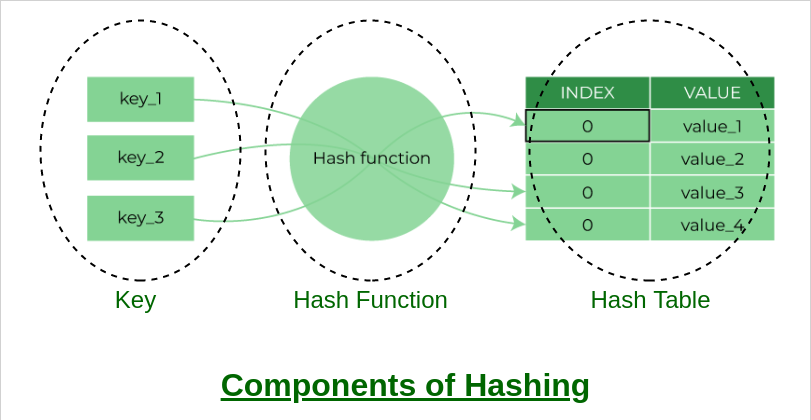

In [2]:
str_val = 'GeeksforGeeks'
print("The string hash value is : " + str(hash(str_val)))


The string hash value is : -2160209871863323392


hash() returns hashed value only for immutable objects, hence can be used as an indicator to check for mutable/immutable objects.</br>
In Python, dictionaries use hash values of keys for quick data retrieval. If an object is mutable and its content changes, its hash value will ideally change as well. This will lead to inconsistency, as the hash table would not be able to locate the object using the original hash key.

In [3]:
# tuple are immutable
tuple_val = (1, 2, 3, 4, 5)

# list are mutable
list_val = [1, 2, 3, 4, 5]

# Printing the hash values.
# Notice exception when trying
# to convert mutable object
print("The tuple hash value is : " + str(hash(tuple_val)))
print("The list hash value is : " + str(hash(list_val)))


The tuple hash value is : -5659871693760987716


TypeError: unhashable type: 'list'

Here we will override the __hash()__ methods to call the hash(), and __eq__() method will check the equality of the two custom objects.

In [4]:
class Emp:
	def __init__(self, emp_name, id):
		self.emp_name = emp_name
		self.id = id

	def __eq__(self, other):
	
		# Equality Comparison between two objects
		return self.emp_name == other.emp_name and self.id == other.id

	def __hash__(self):
	
		# hash(custom_object)
		return hash((self.emp_name, self.id))

emp = Emp('Ragav', 12)
print("The hash is: %d" % hash(emp))

# We'll check if two objects with the same
# attribute values have the same hash
emp_copy = Emp('Ragav', 12)
print("The hash is: %d" % hash(emp_copy))


The hash is: -5540783459129345083
The hash is: -5540783459129345083


Defining the __eq__ method alongside __hash__ in a Python class is essential for ensuring that the object behaves correctly in collections that rely on hashing, such as sets and dictionaries. When implementing custom classes, you generally need to override both methods to maintain consistency and to adhere to the contract that hashable objects should fulfill. 

Objects hashed using hash() are irreversible, leading to loss of information.

In [6]:
import time
import random

# Generate random data
n_elements = 10**6
data_list = [(i, f"val_{i}") for i in range(n_elements)]
data_dict = {key: value for key, value in data_list}

# Shuffle list to remove any sort order
random.shuffle(data_list)

# Search for a value near the end to maximize search time in list
search_key = n_elements - 1

# Measure time to search in list
start_time = time.time()
for key, value in data_list:
    if key == search_key:
        list_retrieved_value = value
        break
end_time = time.time()
list_time = end_time - start_time

# Measure time to search in dictionary
start_time = time.time()
dict_retrieved_value = data_dict[search_key]
end_time = time.time()
dict_time = end_time - start_time

# Display results
print(f"Time taken to search in list: {list_time:.6f} seconds")
print(f"Time taken to search in dictionary: {dict_time:.10f} seconds")


Time taken to search in list: 0.177034 seconds
Time taken to search in dictionary: 0.0000000000 seconds


<span style="font-size: 30px; font-weight: bold; color:#191970">Decorator</span>

In Python, a decorator is a design pattern that allows you to add new functionality to an existing object without modifying its structure. Decorators are very powerful and useful tools in Python since they allow programmers to modify the behavior of functions or classes. They achieve this by wrapping the target function or class method within another function, thereby extending its behavior.

Decorators in Python are implemented as **higher-order functions**, i.e., functions that take functions as arguments and return functions as their results.</br>
**Essentially, decorators take a function, extend its behavior, and then return it or substitute it with another function**. </br>You can apply a decorator using the "@" symbol before the target function is defined.

In [1]:
import time

# Define the decorator
def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Elapsed time for {func.__name__}: {end_time - start_time:.8f} seconds")
        return result
    return wrapper

# Apply the decorator using the "@" symbol
@timing_decorator
def example_function(n):
    sum_ = 0
    for i in range(n):
        sum_ += i
    return sum_

# Call the decorated function
result = example_function(1000000)


Elapsed time for example_function: 0.04753828 seconds


In [2]:
@timing_decorator
def example_function2(n):
    start=time.time()
    sum_ = 0
    for i in range(n):
        sum_ += 2
    end=time.time()
    duration=end-start
    return sum_

# Call the decorated function
result = example_function2(1000000)

Elapsed time for example_function2: 0.04651999 seconds


<span style="color:#A52A2A;font-size: 20px; font-weight: bold;">When to Use Decorators</span></br>
- **Code Reusability**: If you have a block of code that is repeated across multiple functions or methods, you can centralize this code into a decorator.

- **Aspect-Oriented Programming**: For separating concerns like logging, authorization, etc., from the core logic of the function.

- **Caching/Memoization**: To remember the output of expensive function calls and return the cached result when the same inputs occur again.

- **Monitoring**: Collecting data for profiling functions, like how many times they were called and what the average execution time is.

- **Validation**: For checking the inputs or outputs of a function, like type checking, value range checking, etc.

- **Enrichment**: Modifying the inputs or outputs of a function, for example, calculating and passing some additional data to a web page renderer function.

**Another example**</br>
A simple caching mechanism can be implemented using Python decorators to store the results of function calls in a dictionary. This is often referred to as memoization. Below is an example where a decorator caches the results of a function that computes the Fibonacci sequence:

In [ ]:
def cache_decorator(func):
    cache = {}
    
    def wrapper(*args, **kwargs):
        # Convert the arguments and keyword arguments to a hashable key
        key = hash((func,args, frozenset(kwargs.items())))
        
        # Check if the result has already been computed and cached
        if key in cache:
            return cache[key]
        
        # Compute the result and cache it
        result = func(*args, **kwargs)
        cache[key] = result
        
        return result
    
    return wrapper

# Applying the cache_decorator to a recursive Fibonacci function
@cache_decorator
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

# Test the decorated function
print(fibonacci(35))  # This will be much faster with the caching decorator


In this example, the cache_decorator function defines a dictionary cache to store the results of function calls. The wrapper function checks whether a result for the current arguments already exists in the cache. If it does, it returns the cached result. Otherwise, it computes the result, stores it in the cache, and then returns it.

The functools.wraps function is used to preserve the function's metadata (such as its name and docstring) when it is replaced by the decorator.

<span style="font-size: 30px; font-weight: bold; color:#191970">Property</span>

In Python's Object-Oriented Programming (OOP) paradigm, a property is a special kind of attribute that **provides a layer of control over access to an object's data attributes**. Properties allow you to control how an attribute's value is accessed, modified, or computed, thus encapsulating data manipulation logic within the object itself. They are particularly useful for achieving a balance between data encapsulation and convenient syntax.

In [1]:
class Circle: 
    def __init__(self, radius):
        self._radius = radius

    @property
    def radius(self):
        return self._radius

    @radius.setter
    def radius(self, value):
        if value < 0:
            raise ValueError("Radius cannot be negative")
        self._radius = value

    @property
    def diameter(self):
        return self._radius * 2

    @diameter.setter
    def diameter(self,value):
        self.radius=value/2

    @property
    def area(self):
        return 3.14159 * self._radius ** 2


In [3]:
c=Circle(5)
c.radius=4
c.radius

4

<span style="color:#A52A2A;font-size: 20px; font-weight: bold;">How Properties Work</span>
The @property decorator actually generates methods that are bound to the attribute name. When you define a method with @property, that method is called when you access the property, effectively replacing an attribute with a method call but without changing the syntax.

The @<property_name>.setter decorator specifies the corresponding setter method, which will be invoked when a value is assigned to the property.

<span style="color:#A52A2A;font-size: 20px; font-weight: bold;">Advantages</span>
- Encapsulation: Properties encapsulate the internal representation of an object's data, allowing you to change the implementation without affecting the code that uses the object.

- Validation: Using properties, you can add validation logic to ensure that an attribute meets certain conditions before it's modified.

- Derived Attributes: Properties can compute their values from other attributes, eliminating the need for explicit method calls.

- Syntax: Properties allow you to manipulate an object's attributes using a natural and concise syntax, resembling attribute access, rather than method calls.

<span style="font-size: 30px; font-weight: bold; color:#191970">Generators</span>

Generators are a type of iterable, like lists or tuples, but unlike lists, they do not store data in memory. They generate data on the fly, yielding one item at a time, which makes them more memory-efficient for large datasets.

Why Use Generators?
- Memory Efficiency
- Lazy Evaluation
- Simplified Code

In [4]:
# Generator Function
def my_gen():
    yield 1
    yield 2


In [5]:
print(my_gen())

<generator object my_gen at 0x0000025536A35DD0>


In [6]:
for x in my_gen():
    print(x)

1
2


In [7]:
for x in my_gen():
    print(x)

1
2


In [8]:
xx=my_gen()
for x in xx:
    print(x)

1
2


In [9]:
for x in xx:
    print(x)

In [10]:
# Generator Expression
gen_exp = (x for x in range(3))

In [11]:
for a in gen_exp:
    print(a)

0
1
2


In [12]:
gen = (x for x in range(3))
while True:
    try:
        item = next(gen)
        print(item)
    except StopIteration:
        break


0
1
2


In [13]:
print(gen_exp)

<generator object <genexpr> at 0x0000025536AB9A40>


In [14]:
a = [x for x in range(3)]
print(a)


[0, 1, 2]


The primary difference between [x for x in range(3)] and (x for x in range(3)) lies in their types and how they handle memory and iteration. The former is a list comprehension that creates a list, while the latter is a generator expression that creates a generator object.

List Comprehension: [x for x in range(3)]</br>
- Type: Produces a list.
- Memory: Allocates memory for the entire list immediately.
- Evaluation: Eagerly evaluated; the expression is evaluated as soon as it is encountered, and the list is fully populated.
- Usability: Can be indexed, sliced, and iterated multiple times.
- Syntax: Uses square brackets [ ].

Generator Expression: (x for x in range(3))</br>
- Type: Produces a generator.
- Memory: Does not allocate memory for all elements; generates them on-the-fly.
- Evaluation: Lazily evaluated; elements are generated during iteration, not beforehand.
- Usability: Cannot be indexed or sliced; can be iterated only once.
- Syntax: Uses parentheses ( ).

In [16]:
for i in range(3):
    print(next(my_gen()))

1
1
1


why output is only 1???

**Another Example**

In [17]:
def read_large_file(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield line.strip()

# Usage
file_path = 'large_file.txt'  # Replace with your actual large file path
line_generator = read_large_file(file_path)

for line in line_generator:
    # Perform operations on each line
    print(line)


FileNotFoundError: [Errno 2] No such file or directory: 'large_file.txt'


Generators and Coroutines: Advanced usage, lazy evaluation, and implementing custom iterators.
Context Managers: Implementing custom context managers using classes and generators

Concurrency and Parallelism
Threading: Using the threading module.
Multiprocessing: Using the multiprocessing module for CPU-bound tasks.
AsyncIO: Asynchronous programming using the async and await keywords.
Concurrency Primitives: Locks, semaphores, events, conditions, etc.